# HPC assignment 3


## Task 2.5
Use PyTorch to port your code to Nvidia GPUs. For this, you must express the two nested loop operations as NumPy roll operations in 2D as we did for the diffusion code. If you don't have an Nvidia GPU, you can use the Google Colab, as in [3.9.1 Tutorial: Use Google Colab GPUs for PyTorch+GPU](https://canvas.kth.se/courses/44840/pages/3-dot-9-1-tutorial-use-google-colab-gpus-for-pytorch+gpu?wrap=1 "3.9.1 Tutorial: Use Google Colab GPUs for PyTorch+GPU")[3.9.1 Tutorial: Use Google Colab GPUs for PyTorch+GPU](https://canvas.kth.se/courses/44840/pages/3-dot-9-1-tutorial-use-google-colab-gpus-for-pytorch+gpu?wrap=1 "3.9.1 Tutorial: Use Google Colab GPUs for PyTorch+GPU"))

**For this task, we use a different and simpler scheme called Jacobi, where  `f[i-1,j]` and `f[i,j-1]` are calculated at time n instead on n+1.** In this way, we remove the calculation dependencies on the new time step, and it can be easily vectorized.


In [1]:
import torch
"cuda" if torch.cuda.is_available() else "cpu"

'cuda'

In [2]:
def gauss_seidel_torch(f: torch.Tensor):
    """
    Applies the Gauss-Seidel method to solve a system of linear equations represented by the input tensor.

    Parameters:
    f (torch.Tensor): The input tensor representing the system of linear equations.

    Returns:
    torch.Tensor: The updated tensor after applying the Gauss-Seidel method.
    """
    newf = f.clone().detach()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    newf = newf.to(device)
    newf[[-1,0],:] = 0
    newf[:,[-1,0]] = 0


    newf[1:-1, 1:-1] = 0.25 * (
            torch.roll(newf, 1, dims=0)[1:-1, 1:-1]
            + torch.roll(newf, -1, dims=0)[1:-1, 1:-1]
            + torch.roll(newf, 1, dims=1)[1:-1, 1:-1]
            + torch.roll(newf, -1, dims=1)[1:-1, 1:-1]
        )

    return newf

## Task 2.6
Use CuPy to port your code to Nvidia GPUs. See [C.3 Tutorial - Introduction to CuPy](https://canvas.kth.se/courses/44840/pages/c-dot-3-tutorial-introduction-to-cupy?wrap=1 "C.3 Tutorial - Introduction to CuPy")[C.3 Tutorial - Introduction to CuPy](https://canvas.kth.se/courses/44840/pages/c-dot-3-tutorial-introduction-to-cupy?wrap=1 "C.3 Tutorial - Introduction to CuPy")

In [3]:
import cupy as cp

In [4]:
def gauss_seidel_cupy(f: cp.ndarray):
    """
    Applies the Gauss-Seidel method to solve a 2D array using the Cupy library.

    Args:
        f (cp.ndarray): The input 2D array.

    Returns:
        cp.ndarray: The updated 2D array after applying the Gauss-Seidel method.
    """
    newf = cp.array(f)
    newf[[-1,0],:] = 0
    newf[:,[-1,0]] = 0


    newf[1:-1, 1:-1] = 0.25 * (
            cp.roll(newf, 1, axis=0)[1:-1, 1:-1]
            + cp.roll(newf, -1, axis=0)[1:-1, 1:-1]
            + cp.roll(newf, 1, axis=1)[1:-1, 1:-1]
            + cp.roll(newf, -1, axis=1)[1:-1, 1:-1]
        )


    return newf

## Task 2.7
Measure the performance (execution time) with GPU (PyTorch and CuPy) and make a plot of the execution time varying the size of the grid. Compare and comment on the performance difference with and without GPU.

In [5]:
import matplotlib.pyplot as plt

10
50
100
500
1000
5000
10000


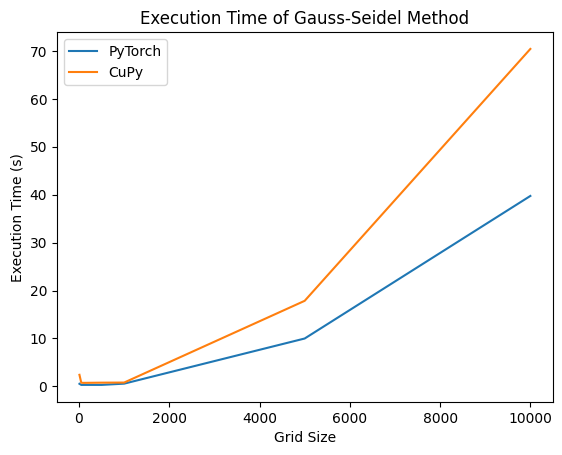

In [6]:
from array import array
import numpy as np
import random
import array
import copy
from functools import wraps
from timeit import default_timer as timer
import matplotlib.pyplot as plt

def timefn(fn):
    from timeit import default_timer as timer
    @wraps(fn)
    def measure_time(*args, **kwargs):
        t1 = timer()
        result = fn(*args, **kwargs)
        t2 = timer()
        time_delta = t2 - t1
        return result, time_delta  # return result and time delta
    return measure_time


ITERS = 1000


@timefn
def runGauss_torch(f):
  for i in range(ITERS):
        f = gauss_seidel_torch(f)
@timefn
def runGauss_cupy(f):
    for i in range(ITERS):
        f = gauss_seidel_cupy(f)


def main():
    times = [[],[]]
    with open("torch.dat", "w") as file:
      pass
    with open("cupy.dat", "w") as file:
      pass
    y = [10,50,100,500, 1000, 5000, 10_000]
    for N in y:
        print(N)
        torchTensor = torch.rand(N, N)
        cudaArray =  cp.random.rand(N, N)
        _, torch_time = runGauss_torch(torchTensor)
        _, cupy_time = runGauss_cupy(cudaArray)
        times[0].append(torch_time)
        times[1].append(cupy_time)
        with open("torch.dat", "a") as file:
          file.write(f"{N}, {torch_time}\n")
        with open("cupy.dat", "a") as file:
          pass
          file.write(f"{N}, {cupy_time}\n")

    return times, y




times, y = main()
plt.plot(y,times[0],label="PyTorch")
plt.plot(y,times[1], label="CuPy")
plt.xlabel("Grid Size")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time of Gauss-Seidel Method")
plt.legend()
plt.show()

## Task 2.8
Save the newgrid matrix as an hdf5 file using h5py  (see the tutorial [C.4 Tutorial - The HDF5 Library/Module](https://canvas.kth.se/courses/44840/pages/c-dot-4-tutorial-the-hdf5-library-slash-module?wrap=1 "C.4 Tutorial - The HDF5 Library/Module")[C.4 Tutorial - The HDF5 Library/Module](https://canvas.kth.se/courses/44840/pages/c-dot-4-tutorial-the-hdf5-library-slash-module?wrap=1 "C.4 Tutorial - The HDF5 Library/Module")).

In [7]:
import h5py

Save the matrix on a hdf5 file

In [8]:

N=800
torchTensor = torch.rand(N, N)
runGauss_torch(torchTensor)
with h5py.File('gauss.hdf5', 'w') as f:
    # Crea un dataset para almacenar el tensor
    dataset = f.create_dataset('tensor', (N, N), dtype='float32')

    # Guarda el tensor en el dataset
    dataset[:] = torchTensor.numpy()


Check if was corrrected saved

In [9]:
f = h5py.File('gauss.hdf5', 'r')
list(f.keys())

['tensor']

In [10]:
dset = f['tensor']
print(dset.shape)
dset.dtype

(800, 800)


dtype('<f4')